In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [2]:
dataset_path = '/content/drive/MyDrive/datasets/17Flowers/train'
width = height = 224

In [3]:
# image augmentation
idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

dataset_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

dataset_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    target_size=(224, 224)

)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [4]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(width, height, 3),
    pooling='avg'
)

9406464/9406464 [==============================] - 1s 0us/step


In [5]:
for layer in base_model.layers[0:-4]:
  layer.trainable = False

In [6]:
model = models.Sequential([
    base_model,
    layers.Dropout(0.2),
    layers.Dense(17, activation='softmax')
])

In [7]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [8]:
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=32)

Epoch 1/32
26/26 [==============================] - 603s 23s/step - loss: 2.2655 - accuracy: 0.3305 - val_loss: 1.6294 - val_accuracy: 0.5635
Epoch 2/32
26/26 [==============================] - 17s 664ms/step - loss: 1.2623 - accuracy: 0.6780 - val_loss: 1.1612 - val_accuracy: 0.6396
Epoch 3/32
26/26 [==============================] - 19s 744ms/step - loss: 0.8482 - accuracy: 0.8044 - val_loss: 0.8845 - val_accuracy: 0.7462
Epoch 4/32
26/26 [==============================] - 17s 671ms/step - loss: 0.6247 - accuracy: 0.8748 - val_loss: 0.7420 - val_accuracy: 0.7716
Epoch 5/32
26/26 [==============================] - 18s 689ms/step - loss: 0.4953 - accuracy: 0.8894 - val_loss: 0.6670 - val_accuracy: 0.7817
Epoch 6/32
26/26 [==============================] - 19s 720ms/step - loss: 0.3581 - accuracy: 0.9332 - val_loss: 0.5946 - val_accuracy: 0.8071
Epoch 7/32
26/26 [==============================] - 18s 679ms/step - loss: 0.3115 - accuracy: 0.9429 - val_loss: 0.5534 - val_accuracy: 0.8173


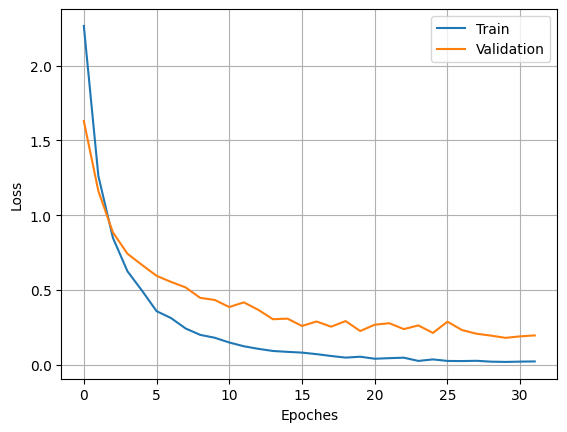

In [10]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

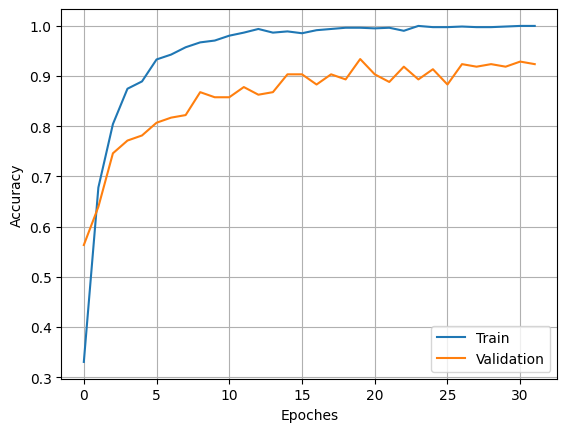

In [11]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [12]:
idg = ImageDataGenerator(
    rescale=1./255
)

dataset_test = idg.flow_from_directory(
    '/content/drive/MyDrive/datasets/17Flowers/test',
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

Found 340 images belonging to 17 classes.


In [13]:
model.evaluate(dataset_test)

11/11 [==============================] - 166s 17s/step - loss: 0.2393 - accuracy: 0.9206


[0.23927590250968933, 0.9205882549285889]

In [14]:
model.save('/content/drive/MyDrive/PyLearn 7 Course/54.TransferLearning/17flower_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
Y_pred = []
Y_test = []

for i in range(11):
  for label in model.predict(dataset_test[i][0]):
    Y_pred.append(np.argmax(label))
  for label in dataset_test[i][1]:
    Y_test.append(np.argmax(label))

Y_pred = np.array(Y_pred)
Y_test = np.array(Y_test)

1/1 [==============================] - 1s 852ms/step


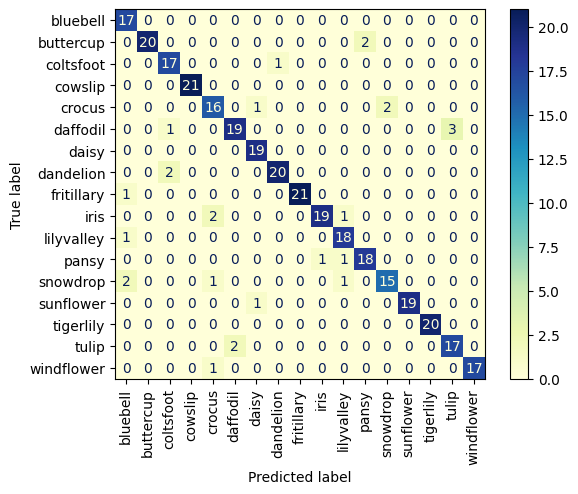

In [16]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=dataset_test.class_indices)

cm_display.plot(cmap='YlGnBu', xticks_rotation=90)
plt.show()